In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the snowball sampling results
cesna_res = pd.read_csv('../AnyNewEdgeCountSnowballedCleanedSplit100BOCCResultsCombinedFixed/2020/paris.cesna.2020.bocc_res.tsv',sep='\t')
greedy_res = pd.read_csv('../AnyNewEdgeCountSnowballedCleanedSplit100BOCCResultsCombinedFixed/2020/paris.greedy.2020.bocc_res.tsv',sep='\t')
infomap_res = pd.read_csv('../AnyNewEdgeCountSnowballedCleanedSplit100BOCCResultsCombinedFixed/2020/paris.infomap.2020.bocc_res.tsv',sep='\t')
walktrap_res = pd.read_csv('../AnyNewEdgeCountSnowballedCleanedSplit100BOCCResultsCombinedFixed/2020/paris.walktrap.2020.bocc_res.tsv',sep='\t')

In [3]:
bf_sig = .05 / (cesna_res.shape[0]+greedy_res.shape[0]+infomap_res.shape[0]+walktrap_res.shape[0])
print('Bon-Ferroni cut off',str(bf_sig))

Bon-Ferroni cut off 1.603077909586406e-05


paris.cesna
num <= 0.05 1040
num bon ferroni sig 769
paris.greedy
num <= 0.05 79
num bon ferroni sig 36
paris.infomap
num <= 0.05 88
num bon ferroni sig 35
paris.walktrap
num <= 0.05 42
num bon ferroni sig 23
Total number of bon-feroni significant clusters 863


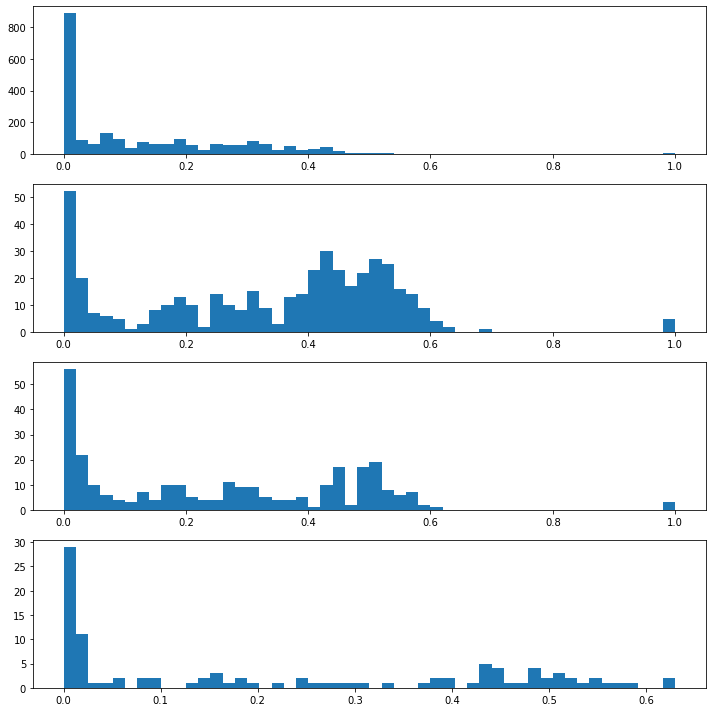

In [5]:
# plot distribution of p-values
dfs = [cesna_res, greedy_res, infomap_res, walktrap_res]
algo_names = ['paris.cesna','paris.greedy','paris.infomap','paris.walktrap']
fig, axes = plt.subplots(4)
fig.set_size_inches(10, 10)
total_bon_ferroni_sig = 0
for i in range(4):
    print(algo_names[i])
    axes[i].hist(dfs[i]['snowballing_pvalue'],bins=50)
    print('num <= 0.05',str(sum(dfs[i]['snowballing_pvalue']  <= 0.05)))
    total_bon_ferroni_sig += sum(dfs[i]['snowballing_pvalue']  <= bf_sig)
    print('num bon ferroni sig', str(sum(dfs[i]['snowballing_pvalue']  <= bf_sig)))
#     print(dfs[i][dfs[i]['snowballing_pvalue']  <= bf_sig]['snowballing_pvalue'])
plt.tight_layout()
plt.savefig('../Figures/dist_of_202_pvalues.png')
print('Total number of bon-feroni significant clusters',total_bon_ferroni_sig)